## Yelp Votes

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

* `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
* Each observation in this dataset is a review of a particular business by a particular user.
* The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
* The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
* The "useful" and "funny" columns are similar to the "cool" column.


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#### Load yelp.csf into a DataFrame and explore it, take a look at some correlations, distribution of star ratings etc

In [94]:
df = pd.read_csv('yelp.csv')

In [95]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


#### Let's say that a review is considered positive if it has 4 or 5 stars. Define a column containing 1 for positive reviews and 0 for negative ones. We will try to predict positive reviews using the review text.

In [97]:
# df['review'] = np.where(df.stars > 3, 1, 0)

# OR

df['positive'] = 0
df.loc[df.stars > 3, 'positive'] = 1

df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,positive
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,1
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,1


#### Find how many positive and negative reviews there are in the dataset

In [100]:
df.groupby('positive').count()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
positive,,,,,,,,,,
0,3137,3137,3137,3137,3137,3137,3137,3137,3137,3137
1,6863,6863,6863,6863,6863,6863,6863,6863,6863,6863


## Vectorizing text data

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
# Define a vectorizer, max_features=2000 will only use 2000 most common words from the combined text of all reviews 
v = CountVectorizer(max_features=2000)

In [103]:
v.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

#### Take a look at the dictionary of words

In [104]:
v.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '18',
 '20',
 '24',
 '25',
 '30',
 '40',
 '45',
 '50',
 '60',
 '75',
 '80',
 '90',
 '95',
 '99',
 'able',
 'about',
 'above',
 'absolute',
 'absolutely',
 'accommodating',
 'across',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'admit',
 'advantage',
 'advice',
 'affordable',
 'after',
 'afternoon',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'agreed',
 'ahead',
 'ahi',
 'air',
 'airport',
 'al',
 'alcohol',
 'all',
 'almost',
 'alone',
 'along',
 'alot',
 'already',
 'alright',
 'also',
 'alternative',
 'although',
 'always',
 'am',
 'amazing',
 'ambiance',
 'ambience',
 'american',
 'among',
 'amount',
 'an',
 'and',
 'annoying',
 'another',
 'answer',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'app',
 'apparently',
 'appetizer',
 'appetizers',
 'apple',
 'appointment',
 'appreciate',
 'appreciated',
 'are',
 'area',
 'areas',
 'ar

#### Transforming the text to vectors.
Note that X is a "sparce array"

In [179]:
X = v.transform(df.text)

In [180]:
X.shape

# matrix of 10,000 reviews, with 2000 words

(10000, 2000)

#### Take a look at the ndarray version of X and the shape of X. What is represented by each row and by each column?

In [106]:
a = X.toarray()

In [109]:
a.sum()

# total number of words

1091083

In [110]:
a.shape

(10000, 2000)

#### We would like to predict if a review is positive. Define the y variable to run `clf.fit(X, y)`

In [115]:
y = df.positive

#### Set 25% of the data aside as testing data (use the special sklearn function for this)

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Import the MultinomialNB classifier from sklearn

In [197]:
from sklearn.naive_bayes import MultinomialNB

In [198]:
from sklearn.neighbors import KNeighborsClassifier

#### Create an instance of MultinomialNB classifier with no parameter

In [199]:
clf = MultinomialNB()

#### Train the classifier using the training data

In [200]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Find the predictions for test data and compare them to actual target, what's the accuracy score?

In [201]:
y_pred = clf.predict(X_test)

In [202]:
accuracy_score = (y_pred == y_test).sum() / len(y_test)

<7500x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 520751 stored elements in Compressed Sparse Row format>

#### Compare it to training set accuracy score (predictions for training data)

In [203]:
y_pred2 = clf.predict(X_train)

In [183]:
(y_pred2 == y_train).sum() / len(y_train)

0.8390666666666666

#### Try using more words when vectorizing, see if this improves the accuarcy

In [184]:
c = CountVectorizer(max_features=4000)

In [185]:
c.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [186]:
c.get_feature_names()

['00',
 '000',
 '10',
 '100',
 '101',
 '10pm',
 '11',
 '11am',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '20',
 '200',
 '2010',
 '21',
 '22',
 '24',
 '25',
 '2am',
 '2nd',
 '30',
 '30pm',
 '32',
 '35',
 '3rd',
 '40',
 '45',
 '49',
 '4pm',
 '4th',
 '50',
 '500',
 '5pm',
 '5th',
 '60',
 '65',
 '6pm',
 '70',
 '75',
 '7pm',
 '7th',
 '80',
 '8pm',
 '90',
 '95',
 '99',
 'ability',
 'able',
 'about',
 'above',
 'absolute',
 'absolutely',
 'ac',
 'accept',
 'acceptable',
 'access',
 'accessible',
 'accessories',
 'accommodate',
 'accommodating',
 'accomodating',
 'accompanied',
 'accompanying',
 'according',
 'account',
 'acknowledge',
 'across',
 'act',
 'action',
 'active',
 'activities',
 'actual',
 'actually',
 'add',
 'added',
 'addicted',
 'addictive',
 'adding',
 'addition',
 'additional',
 'address',
 'adds',
 'adequate',
 'admit',
 'adorable',
 'adore',
 'adult',
 'adults',
 'advance',
 'advantage',
 'adventure',
 'adventurous',
 'advice',
 'afford',
 'affordabl

In [187]:
X2 = c.transform(df.text)

In [188]:
y2 = df.positive

In [189]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)

In [190]:
clf.fit(X_train2, y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [191]:
y_pred3 = clf.predict(X_test2)

In [192]:
accuracy_score1 = (y_pred3 == y_test2).sum() / len(y_test2)

In [220]:
y2.size

10000

#### Plot a graph of test accuracy as a function of number of words

Text(0,0.5,'Accuracy Score')

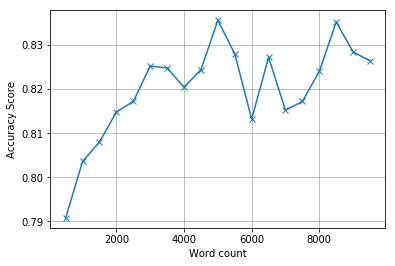

In [229]:
y3 = df.positive
accuracy_list = []
k = []

for i in range(500, 10000, 500):
    cv = CountVectorizer(max_features = i)
    cv.fit(df.text)
    X3 = cv.transform(df.text)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)
    clf.fit(X_train3, y_train3)
    y_pred4 = clf.predict(X_test3)
    accuracy = (y_pred4 == y_test3).sum() / len(y_test3)
    accuracy_list.append(accuracy)
    k.append(i)

plt.plot(k, accuracy_list, '-x')
plt.grid()
plt.xlabel("Word count")
plt.ylabel("Accuracy Score")

If done with all tasks in this notebook, continue with this one using the same data for a regression exercise: https://github.com/justmarkham/DAT8/blob/master/homework/10_yelp_votes.md